![irl](https://www.jobvacancyresult.com/storage/company/1976_innomatics.png)

# Laptop Price Prediction

## Name: Mohammad Wasiq

## E-mail: `mohammadwasiq0786@gmail.com`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_details.csv')

In [3]:
df.head(10)

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,"₹38,990",Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...
7,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,4.1,"₹44,990",AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...


In [4]:
df['Feature'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

# Data Cleaning

In [5]:
# MRP
df['MRP']=df['MRP'].str.replace('₹','')
df['MRP']=df['MRP'].str.replace(',','')
df['MRP']=df['MRP'].astype('float64')
df['MRP'].head()

0    36990.0
1    39990.0
2    32990.0
3    49990.0
4    49990.0
Name: MRP, dtype: float64

In [6]:
# Feature and Product
print(df['Feature'][100])
print(df['Product'][100])

Intel Core i7 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 Inch) Display2 Year Carry-In Warranty Term
MSI Core i7 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce RTX 3050/144 Hz) ...


In [7]:
import re
pattern=r'(?:AMD|Intel|M1|Apple|Qualcomm Snapdragon)[\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.findall(pattern, x))

In [8]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))

In [9]:
pattern=r'^(?:AMD Ryzen|Intel|Apple)'
df['Processor_type'] = df['Processor'].apply(lambda x : re.findall(pattern, x))

In [10]:
df['Processor_type'].value_counts()

[Intel]        390
[AMD Ryzen]    307
[Apple]         19
[]               4
Name: Processor_type, dtype: int64

In [11]:
df.Processor_type = df.Processor_type.apply(lambda x : ''.join(x))
index_names = df[ df['Processor_type'] ==''].index

df.drop(index_names, inplace = True)
df['Processor_type'].value_counts()

Intel        390
AMD Ryzen    307
Apple         19
Name: Processor_type, dtype: int64

In [12]:
pattern=r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(pattern, x))

In [13]:
index_names = df[ df['RAM'] == '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM, 8 GB DDR4 RAM'].index

df.drop(index_names, inplace = True)

In [14]:
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df['RAM_GB']=df['RAM'].str[0:2]

In [15]:
df.RAM_GB.value_counts()

8     400
16    263
4      35
32     17
12      1
Name: RAM_GB, dtype: int64

In [16]:
pattern=r'(?:DDR4|DDR5|LPDDR4X|LPDDR5|Unified Memory|LPDDR4|LPDDR4X|LPDDR3)'

df['RAM_type'] = df['Feature'].apply(lambda x : re.findall(pattern, x))

In [17]:
df.RAM_type = df.RAM_type.apply(lambda x : ''.join(x))

df.RAM_type.value_counts()

DDR4              549
DDR5               92
LPDDR4X            36
Unified Memory     12
LPDDR5              9
DDR4DDR4            8
LPDDR4              8
DDR4DDR5DDR4        1
LPDDR3              1
Name: RAM_type, dtype: int64

In [18]:
df['RAM_type']=df['RAM_type'].replace('DDR4DDR4','DDR4')
df['RAM_type']=df['RAM_type'].replace('DDR4DDR5DDR4','DDR4')

In [19]:
df['RAM_type']

0        DDR4
1        DDR4
2        DDR4
3        DDR4
4        DDR4
        ...  
715    LPDDR4
716      DDR4
717      DDR5
718    LPDDR5
719      DDR4
Name: RAM_type, Length: 716, dtype: object

In [20]:
pattern=r'\d+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.findall(pattern, x))
df['Storage'].head()

0    [256 GB SSD]
1    [512 GB SSD]
2    [512 GB SSD]
3    [512 GB SSD]
4    [512 GB SSD]
Name: Storage, dtype: object

In [21]:
df.Storage = df.Storage.apply(lambda x : ''.join(x))

index_names = df[ df['Storage'] == ''].index

df.drop(index_names, inplace = True)

In [22]:
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df['Storage'].head()

0    256 GB SSD
1    512 GB SSD
2    512 GB SSD
3    512 GB SSD
4    512 GB SSD
Name: Storage, dtype: object

In [23]:
df['Disk_Type'] = df['Storage'].apply(lambda x:'HDD' if 'HDD' in x else 'SSD' )
df['Disk_Type'].value_counts()

SSD    660
HDD     47
Name: Disk_Type, dtype: int64

In [24]:
df['Disk_size']=df['Storage'].str.split().str[0]
df['Disk_size']=df['Disk_size'].replace('1','1024').replace('2','2048')
df['Disk_size'].head()

0    256
1    512
2    512
3    512
4    512
Name: Disk_size, dtype: object

In [25]:
df['Disk_size'].astype('int')
df['Disk_size'].value_counts()

512     374
1024    220
256      98
128       8
2048      7
Name: Disk_size, dtype: int64

In [26]:
pattern=r'(?:Windows|DOS|Chrome|Mac)[\w\s]+Operating System'
df['OS'] = df['Feature'].apply(lambda x : re.findall(pattern, x))
df['OS'].head()

0    [Windows 11 Operating System]
1    [Windows 11 Operating System]
2    [Windows 11 Operating System]
3    [Windows 10 Operating System]
4    [Windows 11 Operating System]
Name: OS, dtype: object

In [27]:
df.OS = df.OS.apply(lambda x : ''.join(x))
df.drop(df[df['OS']=='Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System'].index,inplace = True)
df.drop(df[df['OS']=='Windows 10 Operating SystemWindows 10 Operating System'].index,inplace = True)
df.drop(df[df['OS']=='Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System'].index,inplace = True)

In [28]:
df['OS'].head()

0    Windows 11 Operating System
1    Windows 11 Operating System
2    Windows 11 Operating System
3    Windows 10 Operating System
4    Windows 11 Operating System
Name: OS, dtype: object

In [29]:
pattern=r'(?:SSD|HDD)\d+[(\w\s).]+Display'
df['Display'] = df['Feature'].apply(lambda x : re.findall(pattern, x))
df['Display'].head()

0      [SSD35.56 cm (14 inch) Display]
1    [SSD39.62 cm (15.6 inch) Display]
2    [SSD39.62 cm (15.6 inch) Display]
3    [SSD39.62 cm (15.6 inch) Display]
4    [SSD39.62 cm (15.6 inch) Display]
Name: Display, dtype: object

In [30]:
df.Display = df.Display.apply(lambda x : ''.join(x))
df.Display=df.Display.str.replace('SSD','')
df.Display=df.Display.str.replace('HDD','')

In [31]:
df['Display'].head()

0      35.56 cm (14 inch) Display
1    39.62 cm (15.6 inch) Display
2    39.62 cm (15.6 inch) Display
3    39.62 cm (15.6 inch) Display
4    39.62 cm (15.6 inch) Display
Name: Display, dtype: object

In [32]:
df['Display_cm']=df['Display'].str[0:5]
df['Display'].head()

0      35.56 cm (14 inch) Display
1    39.62 cm (15.6 inch) Display
2    39.62 cm (15.6 inch) Display
3    39.62 cm (15.6 inch) Display
4    39.62 cm (15.6 inch) Display
Name: Display, dtype: object

In [33]:
pattern= r'(\d+(?:\.\d+)?)'
df['Display_size'] = df['Display'].apply(lambda x : re.findall(pattern, x))

In [34]:
df['Display_inches']=df['Display_size'].str[1]

In [35]:
df['Display_inches'].head()

0      14
1    15.6
2    15.6
3    15.6
4    15.6
Name: Display_inches, dtype: object

In [36]:
df['Display_inches']=df['Display_inches'].replace('35','14')

In [37]:
df=df.drop(columns =['Processor','Storage','Rating','Product','Display','Display_size'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 719
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MRP             704 non-null    float64
 1   Feature         704 non-null    object 
 2   Processor_type  704 non-null    object 
 3   RAM             704 non-null    object 
 4   RAM_GB          704 non-null    object 
 5   RAM_type        704 non-null    object 
 6   Disk_Type       704 non-null    object 
 7   Disk_size       704 non-null    object 
 8   OS              704 non-null    object 
 9   Display_cm      704 non-null    object 
 10  Display_inches  704 non-null    object 
dtypes: float64(1), object(10)
memory usage: 66.0+ KB


In [39]:
df.head()

,MRP,Feature,Processor_type,RAM,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_cm,Display_inches
0,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel,8 GB DDR4 RAM,8,DDR4,SSD,256,Windows 11 Operating System,35.56,14
1,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel,8 GB DDR4 RAM,8,DDR4,SSD,512,Windows 11 Operating System,39.62,15.6
2,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel,8 GB DDR4 RAM,8,DDR4,SSD,512,Windows 11 Operating System,39.62,15.6
3,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen,8 GB DDR4 RAM,8,DDR4,SSD,512,Windows 10 Operating System,39.62,15.6
4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel,8 GB DDR4 RAM,8,DDR4,SSD,512,Windows 11 Operating System,39.62,15.6


# Visualization

<AxesSubplot:>

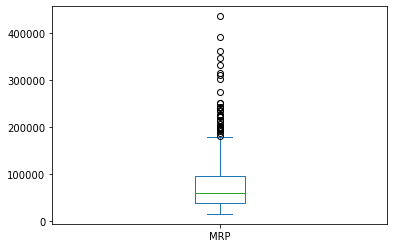

In [40]:
df['MRP'].plot(kind='box')

<AxesSubplot:>

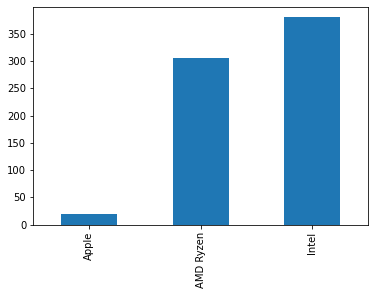

In [41]:
# Processor_tpre
df['Processor_type'].value_counts().sort_values().plot(kind='bar')

**Conclusion :**

From the above **bar** plot we can easily say according to our dataset most of the laptop users use **`Intel`** processor. So my suggestion for laptop company is to produce more Intel processor laptop, then **`AMD Ryzen`** and then **`Apple`**. Users don't use Apple because it is too costly and not affordable for anyone.

I am also using **Inter** Processor.

<AxesSubplot:>

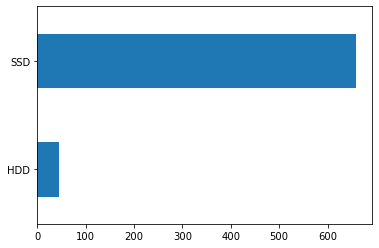

In [42]:
# Disk type
df['Disk_Type'].value_counts().sort_values().plot(kind='barh')

**Conclusion :**

From the above **bar** plot we can easily say according to our dataset most of the laptop users use **`SDD`** disk. Users use SSD because the speed  of SDD is too fast and our laptops run/work smoothly.

I am also using **SDD** Hard Disk.

<AxesSubplot:>

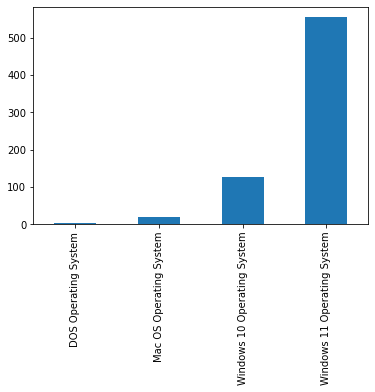

In [43]:
# OS
df['OS'].value_counts().sort_values().plot(kind='bar')

**Conclusion :**

From the above **bar** plot we can easily say according to our dataset most of the laptop users use **`Window 11`** Operating System. Users use Window 11 because it is the latest OS and **`Window 11`** is the second choice of the users and that **`Mac OS`** is used and very few users use **`DOS`** Operating System.

I am using **Window 10** Operating System and think to switch on **Window 11**.

<AxesSubplot:>

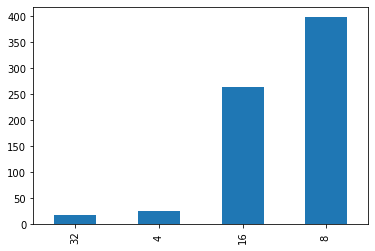

In [44]:
# RAM_SIZE
df['RAM_GB'].value_counts().sort_values().plot(kind='bar')

**Conclusion :**

From the above **bar** plot we can easily say according to our dataset most of the laptop users use **8** RAM. The larger RAM, the higher speed.

I am using 16 GB RAM

<AxesSubplot:>

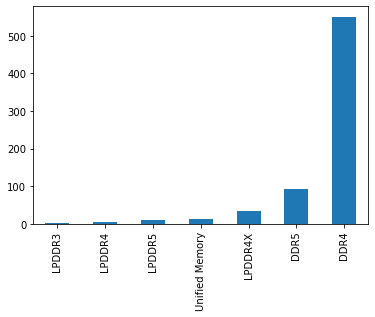

In [45]:
df['RAM_type'].value_counts().sort_values().plot(kind='bar')

**Conclusion :**

From the above **bar** plot we can easily say according to our dataset most of the laptop users use **`DDR4`** type RAM and the second choice of the users is DDR5 and that **`LPDDR3`** is used and very few users.

I am using **DDR4** RAM type.

<AxesSubplot:>

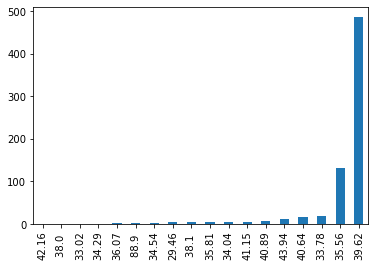

In [46]:
df['Display_cm'].value_counts().sort_values().plot(kind='bar')

<AxesSubplot:>

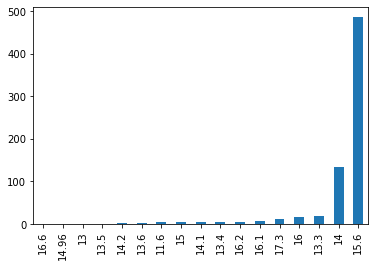

In [47]:
df['Display_inches'].value_counts().sort_values().plot(kind='bar')

**Conclusion :**

From the above **bar** plot we can easily say according to our dataset most of the laptop users use **`15.6 Inches`** Display because it is really interested to work with a large screen than a smaller one. and the second choice of the users is 14 Inches.

I am using **14** Laptop Display.

<AxesSubplot:ylabel='Density'>

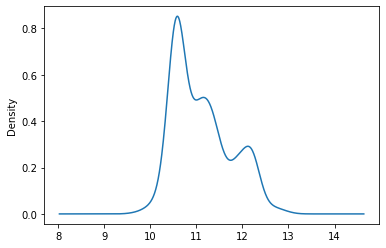

In [48]:
df['MRP']=np.log(df.MRP)
df['MRP'].plot(kind='kde')

**Conclusion :**

Laptop prices are positively skewed.

In [49]:
X = df.drop(columns=["RAM", "Display_cm", "Feature",'MRP'])
y = df.MRP

In [50]:
X

,Processor_type,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_inches
0,Intel,8,DDR4,SSD,256,Windows 11 Operating System,14
1,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6
2,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6
3,AMD Ryzen,8,DDR4,SSD,512,Windows 10 Operating System,15.6
4,Intel,8,DDR4,SSD,512,Windows 11 Operating System,15.6
...,...,...,...,...,...,...,...
714,AMD Ryzen,16,DDR4,SSD,512,Windows 10 Operating System,15.6
716,AMD Ryzen,8,DDR4,SSD,512,Windows 11 Operating System,15.6
717,AMD Ryzen,16,DDR5,SSD,1024,Windows 11 Operating System,15.6
718,Intel,16,LPDDR5,SSD,512,Windows 11 Operating System,14


In [51]:
y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
714    11.407565
716    11.204905
717    12.180704
718    11.743958
719    10.839385
Name: MRP, Length: 704, dtype: float64

In [52]:
X.columns

Index(['Processor_type', 'RAM_GB', 'RAM_type', 'Disk_Type', 'Disk_size', 'OS',
       'Display_inches'],
      dtype='object')

In [53]:
col=['Processor_type', 'RAM_GB', 'RAM_type', 'Disk_Type', 'Disk_size', 'OS','Display_inches']

# Train Test Split

In [54]:
from sklearn.preprocessing import LabelEncoder
encode_os = LabelEncoder()
encode_os

LabelEncoder()

In [55]:
X=X[col].apply(lambda col: encode_os.fit_transform(col))

In [56]:
df.isnull().sum()

MRP               0
Feature           0
Processor_type    0
RAM               0
RAM_GB            0
RAM_type          0
Disk_Type         0
Disk_size         0
OS                0
Display_cm        0
Display_inches    0
dtype: int64

In [57]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [58]:
X_train

,Processor_type,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_inches
355,2,3,0,1,4,2,6
161,0,0,0,1,0,3,11
156,0,3,0,1,4,3,11
80,0,0,1,1,0,3,11
9,0,0,0,1,4,3,6
...,...,...,...,...,...,...,...
591,0,0,0,1,0,3,11
55,0,3,0,1,4,3,11
357,0,3,0,1,4,3,11
81,0,0,0,1,0,3,11


In [59]:
X_test

,Processor_type,RAM_GB,RAM_type,Disk_Type,Disk_size,OS,Display_inches
419,2,3,0,1,3,2,11
500,2,3,0,1,4,3,11
339,2,0,0,1,4,3,11
278,0,3,0,0,0,2,11
254,2,0,0,1,4,3,6
...,...,...,...,...,...,...,...
199,2,3,0,0,0,2,11
623,2,0,0,1,4,2,6
432,0,3,0,1,4,3,11
213,2,3,0,1,4,3,11


In [60]:
y_train

355    10.671046
161    11.924969
156    10.563724
80     12.190908
9      10.714196
         ...    
591    11.361986
55     10.532070
357    10.714196
81     11.361986
530    10.596385
Name: MRP, Length: 528, dtype: float64

# Training

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import math
import pickle

In [62]:
reg = LinearRegression()

In [63]:
reg.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = reg.predict(X_test)

# Result

In [65]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Square Error: {mse} \n Mean Absolute Error: {mae} \n Root Mean Square Error : {rmse}")

Mean Square Error: 0.15392457113923627 
 Mean Absolute Error: 0.2740122524542959 
 Root Mean Square Error : 0.3923322203684478


In [66]:
print("R-square", r2_score(y_test, y_pred))

R-square 0.6242275849061873


<AxesSubplot:xlabel='MRP'>

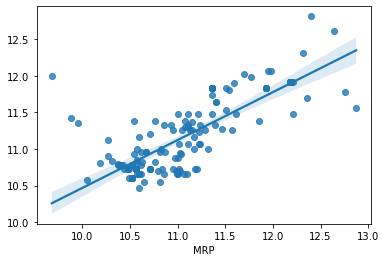

In [67]:
# Predicting the price for a sample data
sns.regplot(y_test, y_pred)

In [68]:
from sklearn.svm import SVR

In [69]:
svr = SVR()

In [70]:
svr.fit(X_train, y_train)

SVR()

In [71]:
yhat = svr.predict(X_test)

<AxesSubplot:xlabel='MRP'>

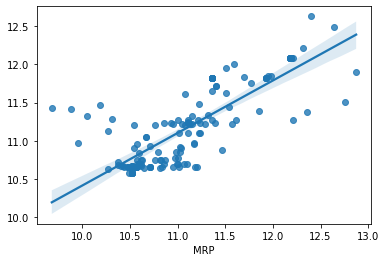

In [72]:
sns.regplot(y_test, yhat)

In [73]:
print("R-square", r2_score(y_test, yhat))

R-square 0.6584028019491619


Afrer comparison between Linear Regression and Support Vector Regression we can easily conclude that SVR performs much better than LR.

The Accuray of SVR is $65\%$ while the accuracy of LR is $62\%$. 

In [74]:
pickle.dump(svr,open('model.sav', 'wb'))

In [75]:
pickle.dump(encode_os, open('encode_os.sav', 'wb'))

In [76]:
pickle.dump(reg, open('finalized_model.sav', 'wb'))

In [77]:
model = pickle.load(open('finalized_model.sav', 'rb'))